### **Notebook for cleaning velocity data**
#### Author: Hannah Nevel

##### Data needs to be in the following format to run this program:
- csv or xlsx file
- column names above each set of values
- file located on local device

##### Import necessary libraries and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px


##### Define needed variables

In [3]:
#Change all backslashes in file path to double back slashes
file_location = "C:\\Users\\HannahNevel\\OneDrive - STF Technologies LLC\\Desktop\DOE RheoSurfR\\Motor Data\compression_2_05_15_2023.csv"

#input the path you want the new file saved at
basepath = 'C:\\Users\\HannahNevel\\OneDrive - STF Technologies LLC\\Desktop\DOE RheoSurfR\\Motor Data\\'

#assign a new filename for the cleaned data
newfile = 'velocity_compression_2_05_15_2023_cleaned.csv'

#for constant velocity data, input velocity threshold value, all data values below this point will be removed
velocity_threshold_low = 1.7

#for cosntant velocity data, input velocity threshold value, all data values above this point will be removed
velocity_threshold_high = 2.3

#assign as a string the name of one of the velocity data columns
vel_col = 'Motor 1 Arm Velocity (mm/min)'

#assign as a string the name of the time column
time_col = 'Time (ms)'

#Input the type of data you are cleaning i.e. constant velocity, sine velocity
run_type = 'constant velocity'


##### Define function to open and import csv or xlsx file, create data frame, and drop missing/null values

In [4]:
def import_csv_file(filepath):
    #file_opening = open(csvfilepath)
    file = pd.read_csv(filepath)

    file_data = pd.DataFrame(file).dropna()
    return file_data

def import_xlsx_file(filepath):
    #file_opening = open(csvfilepath)
    file = pd.read_excel(filepath)

    file_data = pd.DataFrame(file).dropna()
    return file_data

## Change functions depending on the file type
imported_vel_data = import_csv_file(file_location)

#### Clean Data

##### Define functions to remove data points where velocity is less than defined threshold and remove data points where time is 0

In [6]:
def remove_vals_linear(imported_data_frame, vel_thresh_low, vel_thresh_high, velocity_column, time_column):
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[velocity_column] < vel_thresh_low].index, inplace=True)
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[velocity_column] > vel_thresh_high].index, inplace=True)
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[time_column] == 0].index, inplace=True)
    return formatted

def remove_vals_sine(imported_data_frame, velocity_column, time_column):
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[velocity_column] < .01].index, inplace=True)
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[time_column] == 0].index, inplace=True)
    return formatted

##### Run data through cleaning functions, change time column from ms to min, and print

In [8]:


if run_type == 'constant velocity':
    remove_vals_linear(imported_vel_data, velocity_threshold_low, velocity_threshold_high, vel_col, time_col)
elif run_type == 'sine velocity':
    remove_vals_sine(imported_vel_data, velocity_threshold_low, velocity_threshold_high, vel_col, time_col)


imported_vel_data.rename(columns = {'Time (ms)':'Time (min)'}, inplace = True)
imported_vel_data['Time (min)'] = imported_vel_data['Time (min)'].div(60000)
print(imported_vel_data)



       Motor 1 Arm Velocity (mm/min)  Motor 2 Arm Velocity (mm/min)  \
1952                           1.906                          1.109   
1953                           1.906                          1.109   
1954                           1.906                          1.109   
1955                           1.906                          1.109   
1956                           1.906                          1.109   
...                              ...                            ...   
69589                          2.027                          2.005   
69590                          1.978                          1.978   
69591                          1.887                          1.962   
69592                          1.887                          1.962   
69593                          1.887                          1.962   

       Time (min)  Target Velocity (mm/min)  Difference in motor position (mm)  
1952     0.683700                       1.0                       

#### Data Visualization

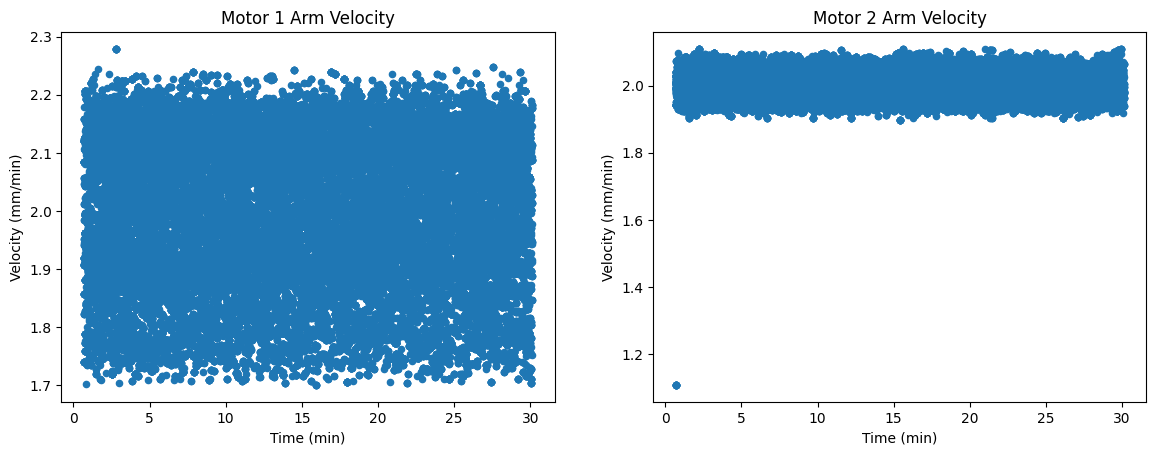

In [32]:
fig, (ax0, ax1) = plt.subplots(1 ,2)

fig.set_figwidth(14)
imported_vel_data.plot(x='Time (min)', y='Motor 1 Arm Velocity (mm/min)', kind='scatter', ax=ax0)
ax0.set_title('Motor 1 Arm Velocity')
ax0.set_xlabel('Time (min)')
ax0.set_ylabel('Velocity (mm/min)')

imported_vel_data.plot(x='Time (min)', y='Motor 2 Arm Velocity (mm/min)', kind='scatter',ax=ax1)
ax1.set_title('Motor 2 Arm Velocity')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Velocity (mm/min)')   


plt.show()
    

##### Save cleaned data to csv file, uncomment after checking data output

In [ ]:
newfile_path = basepath + newfile
print(newfile_path)
#imported_vel_data.to_csv(newfile_path, index = False)

C:\Users\HannahNevel\OneDrive - STF Technologies LLC\Desktop\DOE RheoSurfR\Motor Data\velocity_compression_2_05_15_2023_cleaned.csv
